In [ ]:
# Woolworth Deutschland - pmdarima - annual forecast of Turnover in Mio EUR
# Hauptsitz in Unna bei Dortmund
# CEO - Jost-Stefan Heinig (* 2. August 1962 in Dortmund) ist ein deutscher Einzelhändler, dem Anteile an TEDi und Woolworth Deutschland gehören.

# 1879 - Frank Winfield Woolworth die nach ihm benannte F.W. Woolworth Company in USA gegründet.
# 1926 - die deutsche Tochtergesellschaft in Berlin (DE) gegründet.
# 1927 - in Bremen (DE) das erste Kaufhaus
# 1932 - Woolworth-Konzern unterstützt die Nationalsozialistische Deutsche Arbeiterpartei (NSDAP)
# 1979 - Woolworth ist das größte Kaufhausunternehmen der Welt
# 1997 - wurden die letzten Kaufhäuser in den USA geschlossen
# 1998 - Woolworth Deutschland selbstständig, mit Hauptsitz in Frankfurt am Main (1998 bis 2010)
# 2009 - Insolvenzverfahren eröffnet, bis Juli 2010 Ende des Insolvenzverfahrens. Alle AT Filialen geschlossen.
# 2010 - Rumpfgeschäftsjahr vom 18.05.2010 bis zum 30.04.2011.
# 2020 - Corona Pandemie - Filialen geschlossen
# 2021 - spendete die Woolworth GmbH 100.000 Euro an die FDP
# 2023 - PL Expansion
# 2025 - SK, CZ, AT Expansion


# Forecasting methods: ARIMA, SARIMA, Dynamic regression models, hyerarchical forecasting (top down, bottom up), neural networks, bootstrapping, bagging, vector autoregressions, ...
# libraries: pmdarima, prophet, sktime, Darts, GluonTS, PyTorch,...


# AR (Auto Regressive)
# MA (Moving Average)
# ARMA ( Auto Regressive Moving Average )
# ARIMA ( Auto Regressive Integrated Moving Average ) - Integrated bedeutet Entfernung von Trends.
# manual ARIMA x automated ARIMA
# SARIMAX - seasonal Autoregressive Integrated Moving Average, stepwise search to minimize aic.
# Log Likelihood: -72.347, closer to zero is better model.
# AIC (Akaike Information Criterion): 148.693, smaller AIC has the better model.
# BIC (Bayesian Information Criterion): 149.823, smaller BIC has the better model.
# HQIC (Hannan-Quinn Information Criterion): 148.461, smaller HQIC has the better model.
# Covariance Type: opg - (Outer Product of Gradients) is a common type of covariance matrix estimator used in statistics, particularly for maximum likelihood (ML) estimates.
# std err - minimize Error: a smaller SE means your sample mean is a more precise estimate of the true population mean (less sampling variability), while a larger SE indicates less precision and more spread in sample means, suggesting your sample might not represent the population well.
# z score - Zero (Z=0): The score is exactly the mean (average).Positive (Z > 0): The score is above the mean. Negative (Z < 0): The score is below the mean.
# Ljung-Box (L1) (Q):0.04 - if the data are iid the sample autocorrelations should mostly be close to zero. The Ljung–Box test (named for Greta M. Ljung and George E. P. Box) is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero.
# Jarque-Bera (JB):5.56 - goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution (close to 0 = more normal). Good for sample sizes larger than 300. The larger the sample the more a trivial divergence from the Normal Distribution.
# Shapiro-Wilk, Anderson-Darling, Kolmogorov-SmirnovProb(Q)- small samples.
# Heteroskedasticity (H):7.76 - die Varianz der Störterme nicht konstant ist. Wenn die Varianz der Störterme für alle Ausprägungen der exogenen Prädiktorvariablen nicht signifikant unterschiedlich ist, liegt Homoskedastizität vor.
# Skew: 1.52 - Close to 0: symmetric, between -1 and 1: moderate skewness.Less than -1 or greater than 1: very skewed.
# Prob(H) (two-sided): 0.07 - Two-tailed tests are only applicable when there are two tails, such as in the normal distribution.
# Kurtosis: 3.98 - Mesokurtisch (Kurtosis ≈ 3 oder Exzess-Kurtosis ≈ 0), Leptokurtisch (Kurtosis > 3 oder Exzess-Kurtosis > 0), Platykurtisch (Kurtosis < 3 oder Exzess-Kurtosis < 0)

In [ ]:
# import libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:
# load the file with Discounter List
data = pd.read_csv('Woolworth.csv')
#data = pd.read_excel('Einzelhandel.xlsx', sheet_name='Woolworth', header=None,index_col=False)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     14 non-null     object
 1   Umsatz Tedi DE           14 non-null     int64 
 2   Umsatz Action EU         14 non-null     int64 
 3   Umsatz Woolworth DE      14 non-null     int64 
 4   Kaufhäuser Woolworth DE  14 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 692.0+ bytes


In [ ]:
# Turnover Correlation
corrTA = np.corrcoef(data['Umsatz Tedi DE'], data['Umsatz Action EU'])[0, 1]
print('Correlation of Tedi Deutschland Turnover and Action Europe Turnover is:',corrTA)
corrTW = np.corrcoef(data['Umsatz Tedi DE'], data['Umsatz Woolworth DE'])[0, 1]
print('Correlation of Tedi Deutschland Turnover and Woolworth Germany Turnover is:', corrTW)
corrAW = np.corrcoef(data['Umsatz Action EU'], data['Umsatz Woolworth DE'])[0, 1]
print('Correlation of Action Europe Turnover and Woolworth Germany Turnover is:', corrAW)

Correlation of Tedi Deutschland Turnover and Action Europe Turnover is: 0.9453963854070124
Correlation of Tedi Deutschland Turnover and Woolworth Germany Turnover is: 0.961016684094437
Correlation of Action Europe Turnover and Woolworth Germany Turnover is: 0.9887552872378036


In [ ]:
# Woolworth Germany Warehouses Correlation ( The highest Correlation with European Action Expansion)
# Woolwoth Warehouses growth is very fast and steep since 2021, Similar to Action
corrTA = np.corrcoef(data['Kaufhäuser Woolworth DE'], data['Umsatz Action EU'])[0, 1]
print('Correlation of Kaufhäuser Woolworth DE and Action Europe Turnover is:',corrTA)
corrTW = np.corrcoef(data['Kaufhäuser Woolworth DE'], data['Umsatz Woolworth DE'])[0, 1]
print('Correlation of Kaufhäuser Woolworth DE and Woolworth Germany Turnover is:', corrTW)
corrAW = np.corrcoef(data['Kaufhäuser Woolworth DE'], data['Umsatz Tedi DE'])[0, 1]
print('Correlation of Kaufhäuser Woolworth DE and Tedi Germany Turnover is:', corrAW)

Correlation of Kaufhäuser Woolworth DE and Action Europe Turnover is: 0.9940644234397015
Correlation of Kaufhäuser Woolworth DE and Woolworth Germany Turnover is: 0.980916014045429
Correlation of Kaufhäuser Woolworth DE and Tedi Germany Turnover is: 0.9404067584428476


In [ ]:
data

,Year,Umsatz Tedi DE,Umsatz Action EU,Umsatz Woolworth DE,Kaufhäuser Woolworth DE
0,2010/2011,100,610,257,174
1,2011/2012,403,824,274,200
2,2012/2013,436,1114,283,231
3,2013/2014,466,1506,294,260
4,2014/2015,502,1995,305,275
5,2015/2016,551,2675,332,297
6,2016/2017,628,3418,384,314
7,2017/2018,785,4216,433,348
8,2018/2019,875,5114,471,381
9,2019/2020,927,5569,478,424


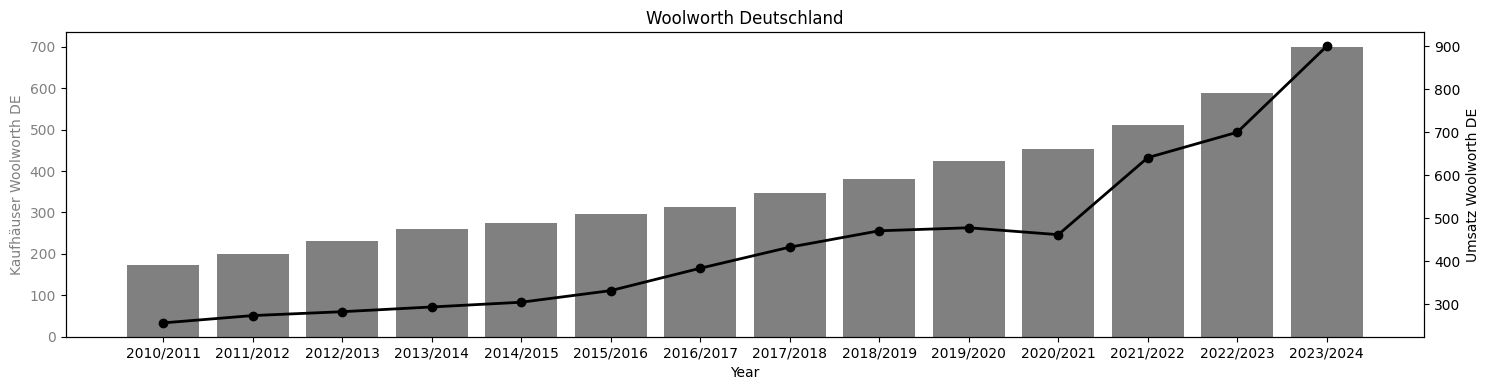

In [ ]:
# Create figure and a main axis object
fig, ax1 = plt.subplots(figsize=(15, 4))

# Plot the bar chart on the primary axis (ax1)
ax1.bar(data["Year"], data["Kaufhäuser Woolworth DE"], color='grey', label='Bar Data (Primary)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Kaufhäuser Woolworth DE', color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# Create a secondary axis object that shares the same x-axis
ax2 = ax1.twinx()

# Plot the line chart on the secondary axis (ax2)
# 'ax1.get_xticks()' is used to align the line data points with the center of the bars
ax2.plot(ax1.get_xticks(), data["Umsatz Woolworth DE"], color='black', marker='o', linestyle='-', linewidth=2, label='Line Data (Secondary)')
ax2.set_ylabel('Umsatz Woolworth DE', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add a title and show the plot
plt.title('Woolworth Deutschland')
fig.tight_layout() # Ensures labels don't get clipped

plt.show()


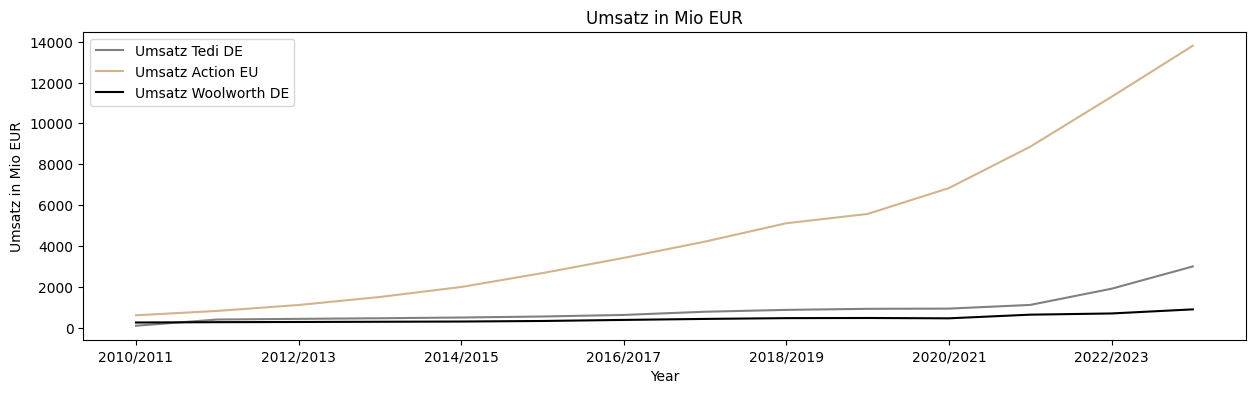

In [ ]:
# plot lines
data.plot(x='Year', y=['Umsatz Tedi DE', 'Umsatz Action EU', 'Umsatz Woolworth DE'], figsize=(15,4), color=['grey', 'tan','black'])

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Umsatz in Mio EUR')

# Set the title of the plot
plt.title('Umsatz in Mio EUR')

# Display the plot
plt.show()

In [ ]:
# Forecasting Method ( 3 years ahead )
# Auto ARIMA (Automatic Autoregressive Integrated Moving Average)

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 25.1 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data
df = pd.read_csv('Woolworth.csv', parse_dates=True, index_col='Year')

/tmp/ipython-input-319032385.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Woolworth.csv', parse_dates=True, index_col='Year')


In [ ]:
# Set up frequency: D, MS, Y, ...
df.index.freq = 'Y'

In [ ]:
# Select the target variable
y_train = df['Umsatz Woolworth DE']

In [ ]:
# Fit the model
model = pm.auto_arima(y_train, seasonal=False, trace=True, error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=148.693, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=150.639, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=150.668, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=152.906, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=152.100, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.614 seconds


In [ ]:
# Set up number of forecasted periods
forecasts = model.predict(n_periods=3)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print(forecasts)

14     949.461538
15     998.923077
16    1048.384615
dtype: float64


In [ ]:
# Model Summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -72.347
Date:                Fri, 26 Dec 2025   AIC                            148.693
Time:                        21:50:24   BIC                            149.823
Sample:                             0   HQIC                           148.461
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     49.4615     37.365      1.324      0.186     -23.772     122.695
sigma2      3993.3254   2735.318      1.460      0.144   -1367.800    9354.451
Ljung-Box (L1) (Q):                   0.04   Jarque-

In [ ]:
# https://www.handelsdaten.de/
# https://de.statista.com/
# https://www.analyticsvidhya.com/blog/2022/06/time-series-forecasting-using-python/
# https://docs.oracle.com/cd/E57185_01/CBREG/ch06s02s02s01.html
# https://www.kaggle.com/code/jurk06/auto-arima-on-multivariate-time-series
# https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c